# Tutorial 1: using a Quantum Device to extract machine-learning features

This notebook reproduces the first part of the [QEK paper](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.107.042615) using the library's low-level API.

By the end of this notebook, you will be know how to:

1. Import a dataset composed of molecular data (the library supports other type of graphs, of course).
2. Compile a register and a sequence of pulses from each graph.
3. Launch the execution of this compiled sequence on a quantum emulator or a physical QPU.
4. Use the result to extract machine-learning features.

A [companion notebook](./tutorial%20220-20Machine20Learning20with20QEK.ipynb) reproduces the machine-learning part of the QEK paper.

If you are not interested in quantum-level details, you may prefer the companion [high-level notebook](./tutorial%201%20-%20Using%20a%20Quantum%20Device%20to%20Extract%20Machine-Learning%20Features%20copy.ipynb) that mirrors this notebook, but using a higher-level API that takes care of all such issues.

## Dataset preparation

As in any machine learning task, we first need to load and prepare data. QEK can work with many types of graphs, including molecular graphs. For this tutorial, we will use the PTC-FM dataset, which contains such molecular graphs.

In [3]:
# Load the original PTC-FM dataset
import torch_geometric.datasets as pyg_dataset
og_ptcfm = [data for data in pyg_dataset.TUDataset(root="dataset", name="PTC_FM")]

display("Loaded %s samples" % (len(og_ptcfm), ))

'Loaded 349 samples'

This package lets researchers embed _graphs_ on Analog Quantum Devices. To do this, we need to give these graphs a geometry (their positions in,
space) and to confirm that the geometry is compatible with a Quantum Device.

This package builds upon the [Pulser framework](https://pulser.readthedocs.io/). Our objective, in this notebook, is to _compile_ graphs
into _Pulser Sequences_, the format understood by our Quantum Devices. In turn, a Pulser Sequence is defined by a target Quantum Device,
a _Pulser Register_ (the position of qubits) and _Pulser Pulses_ (the laser impulses controlling the evolution of the analog device).

As the geometry depends on the Quantum Device, we need to specify a device to use. For the time being, we'll use Pulser's `AnalogDevice`, which is
a reasonable default device. We'll show you a bit further how to use another device.

In this example, our graphs are representations of molecules. To simplify things, we'll use the dedicated class
`qek.data.graphs.MoleculeGraph` that use bio-chemical tools to compute a reasonable geometry from molecular data for a specific
Quantum Device. For other classes of graph, you will need to decide how to compute the geometry and use `qek.data.graphs.BaseGraph`.



In [38]:
from tqdm import tqdm
import pulser as pl
import qek.data.graphs as qek_graphs


graphs_to_compile = []

for i, data in enumerate(tqdm(og_ptcfm)):
    graph = qek_graphs.MoleculeGraph(data=data, device=pl.AnalogDevice, id=i)
    graphs_to_compile.append(graph)


100%|██████████| 349/349 [00:00<00:00, 649.85it/s]


## Create a Pulser sequence

Once the embedding is found, we create a Pulser Sequence that can be interpreted by a Quantum Device.

Not all graphs can be embedded on a given device. In this notebook, for the sake of simplicity, we simply discard graphs that cannot be trivially embedded. Future versions of this library may succeed at embedding more graphs.

In [39]:
compiled = [] 

for graph in tqdm(graphs_to_compile):
    sequence = None
    try:
        sequence = graph.compute_sequence()
    except ValueError:
        # Let's just skip graphs that cannot be computed.
        print("Sequence %s cannot be compiled for this device" % (graph.id, ))
        continue
    if sequence is not None:
        compiled.append((graph, sequence))
print("Compiled %s sequences" % (len(compiled, )))

  4%|▍         | 15/349 [00:00<00:02, 146.63it/s]

Sequence 1 cannot be compiled for this device
Sequence 16 cannot be compiled for this device
Sequence 23 cannot be compiled for this device
Sequence 25 cannot be compiled for this device
Sequence 26 cannot be compiled for this device
Sequence 34 cannot be compiled for this device
Sequence 40 cannot be compiled for this device


 20%|█▉        | 69/349 [00:00<00:01, 237.12it/s]

Sequence 43 cannot be compiled for this device
Sequence 53 cannot be compiled for this device
Sequence 58 cannot be compiled for this device
Sequence 60 cannot be compiled for this device
Sequence 61 cannot be compiled for this device
Sequence 62 cannot be compiled for this device
Sequence 65 cannot be compiled for this device
Sequence 68 cannot be compiled for this device
Sequence 78 cannot be compiled for this device
Sequence 86 cannot be compiled for this device


 34%|███▍      | 118/349 [00:00<00:01, 227.39it/s]ERROR:root:min distance: array(4.99999896)
ERROR:root:min distance: array(4.99999891)
 42%|████▏     | 146/349 [00:00<00:00, 242.38it/s]

Sequence 97 cannot be compiled for this device
Sequence 101 cannot be compiled for this device
Sequence 104 cannot be compiled for this device
Sequence 105 cannot be compiled for this device
Sequence 107 cannot be compiled for this device
Sequence 115 cannot be compiled for this device
Sequence 117 cannot be compiled for this device
Sequence 118 cannot be compiled for this device
Sequence 122 cannot be compiled for this device
Sequence 126 cannot be compiled for this device
Sequence 127 cannot be compiled for this device
Sequence 128 cannot be compiled for this device
Sequence 129 cannot be compiled for this device
Sequence 132 cannot be compiled for this device
Sequence 135 cannot be compiled for this device
Sequence 144 cannot be compiled for this device


ERROR:root:min distance: array(4.99999886)
 49%|████▉     | 171/349 [00:00<00:00, 221.65it/s]

Sequence 155 cannot be compiled for this device
Sequence 157 cannot be compiled for this device
Sequence 165 cannot be compiled for this device
Sequence 166 cannot be compiled for this device
Sequence 169 cannot be compiled for this device
Sequence 171 cannot be compiled for this device
Sequence 175 cannot be compiled for this device
Sequence 181 cannot be compiled for this device
Sequence 185 cannot be compiled for this device
Sequence 186 cannot be compiled for this device


 62%|██████▏   | 218/349 [00:00<00:00, 215.75it/s]

Sequence 193 cannot be compiled for this device
Sequence 197 cannot be compiled for this device
Sequence 203 cannot be compiled for this device
Sequence 204 cannot be compiled for this device
Sequence 206 cannot be compiled for this device
Sequence 208 cannot be compiled for this device
Sequence 214 cannot be compiled for this device
Sequence 215 cannot be compiled for this device
Sequence 220 cannot be compiled for this device
Sequence 224 cannot be compiled for this device


 75%|███████▌  | 262/349 [00:01<00:00, 212.38it/s]ERROR:root:min distance: array(4.99999887)


Sequence 238 cannot be compiled for this device
Sequence 239 cannot be compiled for this device
Sequence 243 cannot be compiled for this device
Sequence 244 cannot be compiled for this device
Sequence 245 cannot be compiled for this device
Sequence 246 cannot be compiled for this device
Sequence 247 cannot be compiled for this device
Sequence 259 cannot be compiled for this device
Sequence 260 cannot be compiled for this device
Sequence 264 cannot be compiled for this device
Sequence 268 cannot be compiled for this device
Sequence 269 cannot be compiled for this device
Sequence 270 cannot be compiled for this device
Sequence 273 cannot be compiled for this device
Sequence 278 cannot be compiled for this device
Sequence 279 cannot be compiled for this device
Sequence 281 cannot be compiled for this device
Sequence 284 cannot be compiled for this device


100%|██████████| 349/349 [00:01<00:00, 218.01it/s]

Sequence 313 cannot be compiled for this device
Sequence 319 cannot be compiled for this device
Sequence 327 cannot be compiled for this device
Sequence 333 cannot be compiled for this device
Sequence 338 cannot be compiled for this device
Sequence 342 cannot be compiled for this device
Compiled 272 sequences


Let's take a look at some of these sequences.

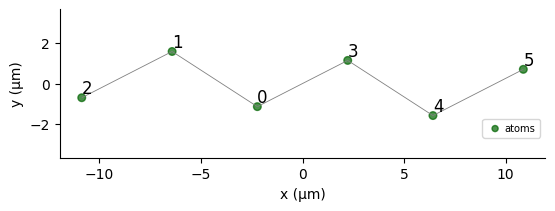

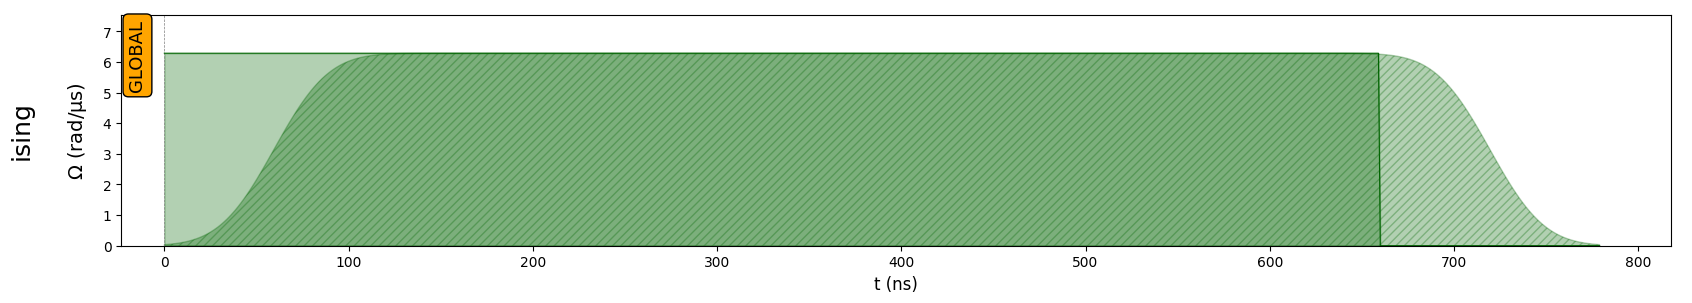

In [40]:
example_graph, example_sequence = compiled[64]

# The molecule, as laid out on the Quantum Device.
example_sequence.register.draw(blockade_radius=pl.AnalogDevice.min_atom_distance + 0.01)

# The laser pulse used to control its state evolution.
example_sequence.draw()

## Experimenting with registers and pulses

You can, of course, adopt different registers or pulses.

In [49]:
import pulser

alternative_sequence = pulser.Sequence(              # A sequence of 0 pulses.
    pulser.Register({"q0": (0, 0)}), # A single atom, called q0, at the center of the device.
    pulser.AnalogDevice                       # A generic analog quantum computer.
)


For this, you'll probably want to take a look at [the documentation of Pulser](https://pulser.readthedocs.io/).


# Executing the compiled sequences on an emulator

While our objective is to run the sequences on a physical QPU, it is generally a good idea to test out some of these sequences on an emulator first. For this example, we'll use the QutipEmulator, the simplest emulator provided with Pulser.

In [53]:
from pulser_simulation import QutipEmulator
from qek.data.dataset import ProcessedData

# In this tutorial, to make things faster, we'll only run the sequences that require 5 qubits or less.
# If you wish to run more entries, feel free to increase this value.
#
# # Warning
#
# Emulating a Quantum Device takes exponential amount of resources and time! If you set MAX_QUBITS too
# high, you can bring your computer to its knees and/or crash this notebook.
MAX_QUBITS = 5

processed_dataset = []
for graph, sequence in tqdm(compiled):
    if len(sequence.qubit_info) > MAX_QUBITS:
        continue
    simulator = QutipEmulator.from_sequence(sequence=sequence)
    states = simulator.run().sample_final_state()
    processed_dataset.append(ProcessedData(sequence=sequence, state_dict=states, target=graph.target))

100%|██████████| 272/272 [00:01<00:00, 177.97it/s]


As mentioned, there are limits to what an emulator can do.

Pasqal has also developed an emulator called emu-mps, which generally provides much better performance and resource usage, so if you hit resource limits, don't hesitate to [check it out](https://github.com/pasqal-io/emulators)!

# Executing compiled sequences on a QPU

Once you have checked that the pulses work on an emulator, you will probably want to move to a QPU. Execution on a QPU takes
resources polynomial in the number of qubits, which hopefully means an almost exponential speedup for large number of qubits.

To experiment with a QPU, you will need either physical access to a QPU, or an account with [PASQAL Cloud](https://docs.pasqal.cloud), which provides you remote access to QPUs built and hosted by Pasqal. In this section, we'll see how to use the latter.

If you don't have an account, just skip to the next section!

In [54]:
HAVE_PASQAL_ACCOUNT = False # If you have a PASQAL Cloud account, fill in the details and set this to `True`.

if HAVE_PASQAL_ACCOUNT: 
    processed_dataset = []

    # Initialize connection
    from pulser.json.abstract_repr.deserializer import deserialize_device
    from pasqal_cloud import SDK

    my_project_id = "your_project_id"# Replace this value with your project_id on the PASQAL platform.
    my_username   = "your_username"  # Replace this value with your username or email on the PASQAL platform.
    my_password   = "your_password"  # Replace this value with your password on the PASQAL platform.
        # Security note: In real life, you probably don't want to write your password in the code.
        # See the documentation of PASQAL Cloud for other ways to provide your password.

    # Initialize the cloud client
    sdk = SDK(username=my_username, project_id=my_project_id, password=my_password)

    # Fetch the latest lists of QPUs
    specs = sdk.get_device_specs_dict()
    # We'll use "Fresnel", generally the recommended QPU on PASQAL Cloud as of this writing.
    device = deserialize_device(specs["FRESNEL"])

    # As previously, create the list of graphs and embed them.
    graphs_to_compile = []
    for i, data in enumerate(tqdm(og_ptcfm)):
        graph = qek_graphs.MoleculeGraph(data=data, device=device, id=i)
        graphs_to_compile.append(graph)

    compiled = []
    for graph in tqdm(graphs_to_compile):
        sequence = None
        try:
            sequence = graph.compute_sequence()
        except ValueError:
            # Let's just skip graphs that cannot be computed.
            print("Sequence %s cannot be compiled for this device" % (graph.id, ))
            continue
        if sequence is not None:
            compiled.append((graph, sequence))

    # Now that the connection is initialized, we just have to send the work
    # to the QPU and wait for the results.
    for graph, sequence in tqdm(compiled):

        # Send the work to the QPU.
        batch = sdk.create_batch(
            # The sequence.
            sequence.to_abstract_repr(),

            # Run each sequence 1000 times to refine results. Recall that quantum computations
            # are probabilistic, so you need to run each sequence many times to progressively
            # refine your probability distribution.
            jobs=[{"runs": 1000}],

            # And wait for the results.
            #
            # WARNING
            #
            # # Wait lines
            #
            # As of this writing, the waiting line to access a QPU can be very long (typically
            # several hours). Argument `wait=True` will stop your program until the batch has
            # completed. You will have to determine whether that's what you want.
            wait=True,
        )

        # The sdk returns a single job.
        job = batch.jobs[0]
        assert job.status == "DONE"
        states = job.result
        processed_dataset.append(ProcessedData(sequence=sequence, state_dict=states, target=graph.target))

There are other ways to use the SDK. For instance, you can enqueue a job and check later whether it has completed. Also, to work around the long waiting lines, Pasqal provides high-performance distributed and hardware-accelerated emulators, which you can access through the SDK.

For more details, [take a look at the documentation of the SDK](https://docs.pasqal.cloud/).


## ...or using the provided dataset

For this notebook, instead of spending hours running the simulator on your computer, we're going to skip
this step and load on we're going to cheat and load the results, which are conveniently stored in `ptcfm_processed_dataset.json`.

In [ ]:
import qek.data.dataset as qek_dataset
processed_dataset = qek_dataset.load_dataset(file_path="ptcfm_processed_dataset.json")
print(f"Size of the quantum compatible dataset = {len(processed_dataset)}")

## A look at the results

We can check the sequence for one of the samples:

In [ ]:
dataset_example = processed_dataset[64]
dataset_example.draw_sequence()

In [ ]:
dataset_example.draw_register()

The results of executing the embedding on the Quantum Device are in field `state_dict`:

In [ ]:
display(dataset_example.state_dict)
print(f"Total number of samples: {sum(dataset_example.state_dict.values())}")

This dictionary represents an approximation of the quantum state of the device for this graph after completion of the algorithm.

- each of the keys represents one possible state for the register (which represents the graph), with each qubit (which represents a single node) being in state `0` or `1`;
- the corresponding value is the number of samples observed with this specific state of the register.

In this example, for instance, we can see that the state observed most frequently is `10000001010`, with 43/1000 samples.


## Machine learning-features

From the state dictionary, we derive as machine-learning feature the _distribution of excitation_. We'll use this in the next notebook to define our kernel.

In [ ]:
dataset_example.draw_excitation()

# What now?

What we have seen so far covers the use of a Quantum Device to extract machine-learning features.

For the next step, we'll see [how to use these features for machine learning](TODO).